## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
!pip install tensorflow
!pip install dill


  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.16.0-cp38-cp38-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.59.3-cp38-cp38-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\robjo\mlproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
  File "C:\Users\robjo\AppData\Local\Temp\ipykernel_6364\2238021026.py", line 14, in <module>
    from catboost import CatBoostRegressor
ModuleNotFoundError: No module named 'catboost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\robjo\mlproject\venv\lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\robjo\mlproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
  File "c:\Users\robjo\mlproject\venv\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
  File "c:\Users\robjo\mlproject\venv\lib

#### Import the CSV Data as Pandas DataFrame

In [3]:
import pandas as pd

# Hardcoding the file names
file_names = [
    'flights_cleaned.csv'
]

# Reading each file into a DataFrame
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# Combining all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER,OP_UNIQUE_CARRIER,TAIL_NUM,...,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY_NEW,DISTANCE,DISTANCE_GROUP
0,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,JFK,"New York, NY",10721,BOS,"Boston, MA",MA,2135,0.0,187.0,1
1,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,JFK,"New York, NY",12892,LAX,"Los Angeles, CA",CA,730,0.0,2475.0,10
2,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,LAX,"Los Angeles, CA",12478,JFK,"New York, NY",NY,1200,0.0,2475.0,10
3,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N102NN,...,JFK,"New York, NY",12892,LAX,"Los Angeles, CA",CA,1845,16.0,2475.0,10
4,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N102NN,...,LAX,"Los Angeles, CA",12478,JFK,"New York, NY",NY,900,0.0,2475.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840772,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N909WN,...,STL,"St. Louis, MO",12953,LGA,"New York, NY",NY,700,6.0,888.0,4
840773,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N937WN,...,ISP,"Islip, NY",10821,BWI,"Baltimore, MD",MD,1235,3.0,220.0,1
840774,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N937WN,...,MCO,"Orlando, FL",12391,ISP,"Islip, NY",NY,930,9.0,971.0,4
840775,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N952WN,...,LGA,"New York, NY",13232,MDW,"Chicago, IL",IL,600,0.0,725.0,3


#### Show Top 5 Records

#### Preparing X and Y variables

In [22]:
# Set negative values to zero
combined_df['DEP_DELAY_NEW'] = combined_df['DEP_DELAY_NEW'].apply(lambda x: 0 if x < 0 else x)

# Remove rows where the value is greater than 180
combined_df = combined_df[combined_df['DEP_DELAY_NEW'] <= 180]

# Filter the rows where ORIGIN is one of 'JFK', 'EWR', 'LGA', 'HPN'
filtered_combined_df = combined_df[combined_df['ORIGIN'].isin(['JFK', 'EWR', 'LGA', 'HPN'])]

# Update the original DataFrame
combined_df = filtered_combined_df.copy()



In [23]:
X = combined_df.drop(columns=['DISTANCE'],axis=1)

In [24]:
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY_NEW
0,3,8,1,1,AA,JFK,"New York, NY",BOS,"Boston, MA",2135,0.0
1,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",730,0.0
2,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1845,16.0
3,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1130,0.0
4,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1030,0.0


In [25]:


print("Categories in 'DAY_OF_MONTH' variable: ", end=" ")
print(combined_df['DAY_OF_MONTH'].unique())

print("Categories in 'DAY_OF_WEEK' variable: ", end=" ")
print(combined_df['DAY_OF_WEEK'].unique())

print("Categories in 'MKT_CARRIER' variable: ", end=" ")
print(combined_df['MKT_CARRIER'].unique())

print("Categories in 'ORIGIN' variable: ", end=" ")
print(combined_df['ORIGIN'].unique())

print("Categories in 'DEST' variable: ", end=" ")
print(combined_df['DEST'].unique())


Categories in 'DAY_OF_MONTH' variable:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Categories in 'DAY_OF_WEEK' variable:  [1 2 3 4 5 6 7]
Categories in 'MKT_CARRIER' variable:  

KeyError: 'MKT_CARRIER'

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310731 entries, 0 to 738456
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   QUARTER            310731 non-null  int64  
 1   MONTH              310731 non-null  int64  
 2   DAY_OF_MONTH       310731 non-null  int64  
 3   DAY_OF_WEEK        310731 non-null  int64  
 4   OP_UNIQUE_CARRIER  310731 non-null  object 
 5   ORIGIN             310731 non-null  object 
 6   ORIGIN_CITY_NAME   310731 non-null  object 
 7   DEST               310731 non-null  object 
 8   DEST_CITY_NAME     310731 non-null  object 
 9   CRS_DEP_TIME       310731 non-null  int64  
 10  DEP_DELAY_NEW      310731 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 28.4+ MB


In [27]:
X['QUARTER'] = X['QUARTER'].astype('object')
X['MONTH'] = X['MONTH'].astype('object')
X['DAY_OF_WEEK'] = X['DAY_OF_WEEK'].astype('object')
X['DAY_OF_MONTH'] = X['DAY_OF_MONTH'].astype('object')
#X['DEST_AIRPORT_ID'] = X['DEST_AIRPORT_ID'].astype('object')
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310731 entries, 0 to 310730
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   QUARTER            310731 non-null  object 
 1   MONTH              310731 non-null  object 
 2   DAY_OF_MONTH       310731 non-null  object 
 3   DAY_OF_WEEK        310731 non-null  object 
 4   OP_UNIQUE_CARRIER  310731 non-null  object 
 5   ORIGIN             310731 non-null  object 
 6   ORIGIN_CITY_NAME   310731 non-null  object 
 7   DEST               310731 non-null  object 
 8   DEST_CITY_NAME     310731 non-null  object 
 9   CRS_DEP_TIME       310731 non-null  int64  
 10  DEP_DELAY_NEW      310731 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 26.1+ MB


In [28]:
X = X.drop(columns=['DEP_DELAY_NEW'])
X

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME
0,3,8,1,1,AA,JFK,"New York, NY",BOS,"Boston, MA",2135
1,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",730
2,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1845
3,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1130
4,3,8,1,1,AA,JFK,"New York, NY",LAX,"Los Angeles, CA",1030
...,...,...,...,...,...,...,...,...,...,...
310726,3,8,31,4,WN,LGA,"New York, NY",TPA,"Tampa, FL",1820
310727,3,8,31,4,WN,LGA,"New York, NY",STL,"St. Louis, MO",1525
310728,3,8,31,4,WN,LGA,"New York, NY",BNA,"Nashville, TN",1855
310729,3,8,31,4,WN,LGA,"New York, NY",ATL,"Atlanta, GA",1055


In [29]:
y = combined_df['DEP_DELAY_NEW']

In [30]:
y.describe()

count    310731.000000
mean         12.596152
std          28.877869
min           0.000000
25%           0.000000
50%           0.000000
75%           9.000000
max         180.000000
Name: DEP_DELAY_NEW, dtype: float64

In [236]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [237]:
X = preprocessor.fit_transform(X)

In [238]:
X.shape

(310731, 296)

In [239]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((248584, 296), (62147, 296))

#### Create an Evaluate Function to give all metrics after model Training

In [240]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    #"Ridge": Ridge(),
    #"K-Neighbors Regressor": KNeighborsRegressor(),
    #"Decision Tree": DecisionTreeRegressor(),
    #"Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(),
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    #"AdaBoost Regressor": AdaBoostRegressor(),
    "LightGBM Regressor": LGBMRegressor(),
    # Neural Network will be defined separately due to its different nature
}

model_list = []
mae_list = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    mae_list.append(model_test_mae)

    print('='*35)
    print('\n')

import scipy.sparse

# Convert sparse matrices to dense format if necessary
X_train_dense = X_train.todense() if isinstance(X_train, scipy.sparse.spmatrix) else X_train
X_test_dense = X_test.todense() if isinstance(X_test, scipy.sparse.spmatrix) else X_test

# Ensure target variables are in compatible format
y_train = np.array(y_train)
y_test = np.array(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the Neural Network with Dropout
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train_dense.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(1))

# Set the learning rate to 1e-4 for the Adam optimizer
adam_optimizer = Adam(learning_rate=1e-3)

# Compile the model with the custom learning rate
nn_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Fit the model with EarlyStopping
nn_model.fit(X_train_dense, y_train, validation_data=(X_test_dense, y_test), epochs=200, batch_size=128, callbacks=[early_stopping])

# Evaluate the Neural Network
y_test_pred_nn = nn_model.predict(X_test_dense)
nn_test_mae, nn_test_rmse = evaluate_model(y_test, y_test_pred_nn)

# Add Neural Network results to the lists
model_list.append('Neural Network')
mae_list.append(nn_test_mae)

# Create DataFrame and sort by MAE
mae_dataframe = pd.DataFrame(list(zip(model_list, mae_list)), columns=['Model Name', 'MAE']).sort_values(by=["MAE"], ascending=True)

# Print the sorted DataFrame
print(mae_dataframe)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 27.7701
- Mean Absolute Error: 16.8046
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.8381
- Mean Absolute Error: 16.8572


Lasso
Model performance for Training set
- Root Mean Squared Error: 28.2824
- Mean Absolute Error: 17.4489
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 28.3126
- Mean Absolute Error: 17.4546


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 248584, number of used features: 284
[LightGBM] [Info] Start training from score 12.606334
LightGBM Regressor
Model performance for Training set
- Root Mean Squared Error: 26.1856
- Mean Ab

### Results

In [242]:
import pandas as pd

# Assuming model_list and mae_list are already populated from the model evaluation loop
mae_dataframe = pd.DataFrame(list(zip(model_list, mae_list)), columns=['Model Name', 'MAE']).sort_values(by=["MAE"], ascending=True)

# Print the sorted DataFrame
print(mae_dataframe)


           Model Name        MAE
3      Neural Network  14.675000
2  LightGBM Regressor  15.629193
0   Linear Regression  16.857164
1               Lasso  17.454609


## Linear Regression

In [243]:
from sklearn.metrics import mean_absolute_error

# Assuming nn_model is your trained neural network model
# Ensure X_test_dense is the preprocessed test set appropriate for the neural network

y_pred_nn = nn_model.predict(X_test_dense)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error of the neural network model is %.2f" % mae_nn)


1943/1943 [==============================] - 2s 1ms/step
Mean Absolute Error of the neural network model is 14.67


## Plot y_pred and y_test

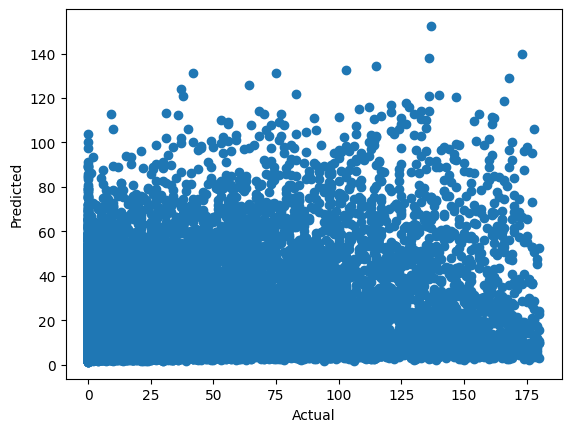

In [244]:
plt.scatter(y_test,y_pred_nn);
plt.xlabel('Actual');
plt.ylabel('Predicted');

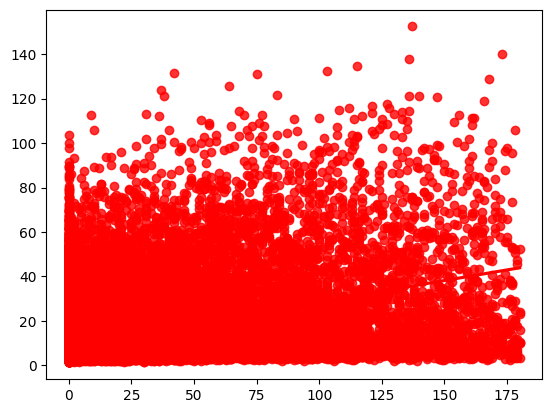

In [245]:
sns.regplot(x=y_test,y=y_pred_nn,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [246]:
# Flatten the predicted values to 1D if they are in 2D format
y_pred_nn_flat = y_pred_nn.flatten()

# Create a DataFrame with actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred_nn_flat,
    'Difference': y_test - y_pred_nn_flat
})

print(pred_df)

       Actual Value  Predicted Value  Difference
0               0.0         6.681334   -6.681334
1               4.0        17.952147  -13.952147
2               0.0         5.848858   -5.848858
3               0.0        14.609876  -14.609876
4               0.0        12.870730  -12.870730
...             ...              ...         ...
62142           0.0         6.815048   -6.815048
62143           0.0         6.029219   -6.029219
62144          46.0        47.914204   -1.914204
62145           0.0        27.689417  -27.689417
62146           0.0        22.195702  -22.195702

[62147 rows x 3 columns]
